In [16]:
import math

def f(x):
    return x*x * (3*x*x - 4*x - 6)

def fprime(x):
    return 12*x * (x*x - x - 1)

def fsecond(x):
    return 36*x*x - 24*x - 12

In [17]:
# actual minimum data for accuracy output
#
minimum_x =   1.618034
minimum_y = -12.090170

<AxesSubplot:xlabel='parameter x', ylabel='cost y = f(x)'>

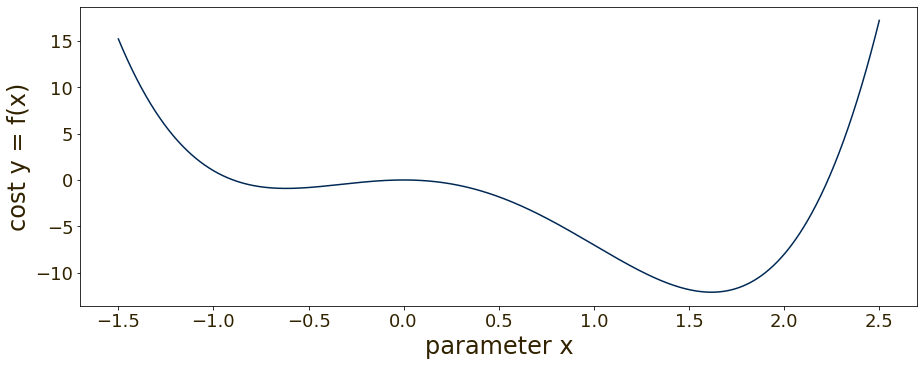

In [51]:
# this plot will show us how f(x) looks
#
import seaborn as sbn
import matplotlib.pyplot as plt

absc = []
ordn = []
size = 1000
init = -1.5
end = 2.5

for i in range(size+1):
    x = init + i*(end-init)/size
    absc.append(x)
    ordn.append(f(x))

frame, axes = plt.subplots()
frame.set_size_inches(15, 5.5)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
axes.set_xlabel("parameter x", fontsize=24, color="#322300")
axes.set_ylabel("cost y = f(x)", fontsize=24, color="#322300")

sbn.lineplot(x=absc, y=ordn, color='#002855', ax=axes)

<AxesSubplot:xlabel='parameter x', ylabel='cost measure y'>

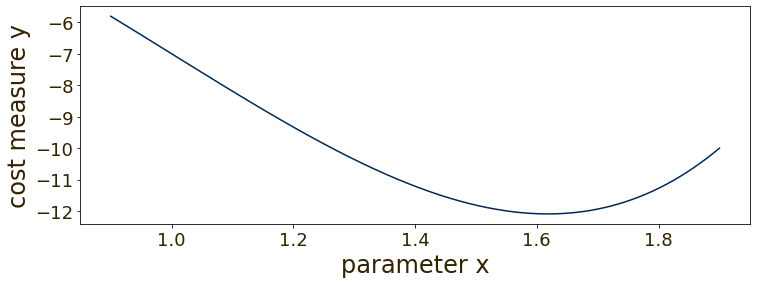

In [10]:
# this plot will show us how f(x) looks in the relevant region
#
import seaborn as sbn
import matplotlib.pyplot as plt

absc = []
ordn = []
size = 1000
init = 0.9
end = 1.9

for i in range(size+1):
    x = init + i*(end-init)/size
    absc.append(x)
    ordn.append(f(x))
    
frame, axes = plt.subplots()
frame.set_size_inches(12, 4)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
axes.set_xlabel("parameter x", fontsize=24, color="#322300")
axes.set_ylabel("cost measure y", fontsize=24, color="#322300")

sbn.lineplot(x=absc, y=ordn, color='#002855', ax=axes)

0	1.1	-8.1917	initial
1	1.355363	-10.857501	accepted
2	1.711205	-11.889031	accepted
3	1.038004	-7.455608	rejected
4	1.627055	-12.088392	accepted

Final outcome: x = 1.627055 , y = -12.088392

deviation in x: 0.009021
deviation in y: 0.001778


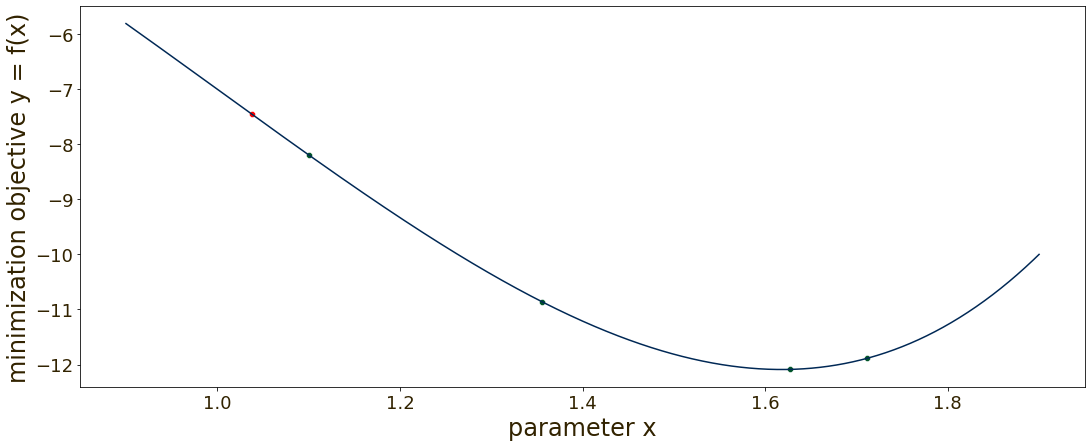

In [29]:
# hill climbing, first variant, where in each step
# we aim at having y = f(x) decrease by the amount delta
#
# whenever this fails, we reduce delta by the factor alpha and try again
#
# this stops when delta has become very small (controlled by choice of epsilon)

x, delta = 1.1, 3
alpha = 0.125

y = f(x)
i = 0
print(0, round(x, 6), round(y, 6), "initial", sep="\t")

x_accepted = [x]
y_accepted = [y]
x_rejected = []
y_rejected = []

for i in range(1, 5):
    yprime = fprime(x)
    if yprime == 0:
        print("plateau reached; terminating\n")
        break
    xshift = -delta/yprime
    xtest = x + xshift
    ytest = f(xtest)
    print(i, round(xtest, 6), round(ytest, 6), sep="\t", end="\t")
    if ytest < y:
        x, y = xtest, ytest
        print("accepted")
        x_accepted.append(xtest)
        y_accepted.append(ytest)
    else:
        delta *= alpha
        print("rejected")
        x_rejected.append(xtest)
        y_rejected.append(ytest)

print("\nFinal outcome: x =", round(x, 6), ", y =", round(y, 6), end="\n\n")

# redraw the line plot for f(x)
#
frame, axes = plt.subplots()
frame.set_size_inches(18, 7)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
axes.set_xlabel("parameter x", fontsize=24, color="#322300")
axes.set_ylabel("minimization objective y = f(x)", fontsize=24, color="#322300")
sbn.lineplot(x=absc, y=ordn, color="#002855", ax=axes)

# add accepted and rejected points to the diagram
#
sbn.scatterplot(x=x_accepted, y=y_accepted, color="#005528", ax=axes)
sbn.scatterplot(x=x_rejected, y=y_rejected, color="r", ax=axes)

# print deviation from the actual minimum
#
print("deviation in x:", round(x - minimum_x, 6))
print("deviation in y:", round(y - minimum_y, 6))

<AxesSubplot:xlabel='parameter x', ylabel="f '(x) = dy/dx">

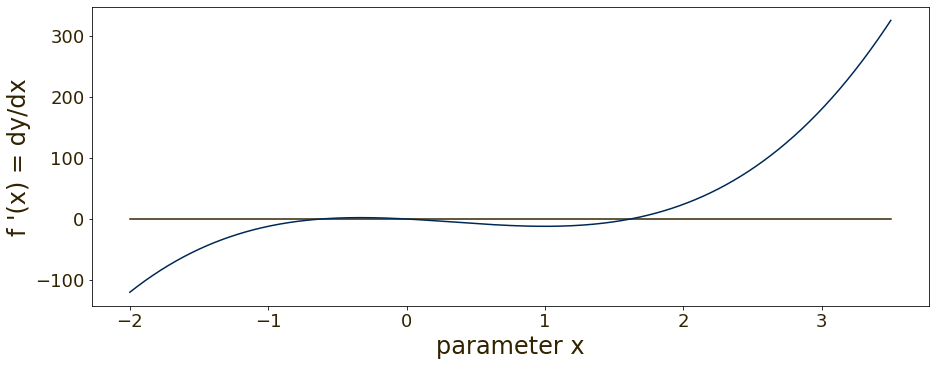

In [54]:
# Newton's method tries to find a zero of the first derivative
# Accordingly, let us look at a plot of f'(x)

absc_prime = []
ordn_prime = []
size = 1000
init = -2
end = 3.5

for i in range(size+1):
    x = init + i*(end-init)/size
    absc_prime.append(x)
    ordn_prime.append(fprime(x))
    
frame, axes = plt.subplots()
frame.set_size_inches(15, 5.5)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
axes.set_xlabel("parameter x", fontsize=24, color="#322300")
axes.set_ylabel("f '(x) = dy/dx", fontsize=24, color="#322300")

sbn.lineplot(x=[init, end], y=[0, 0], color="#322300", ax=axes)
sbn.lineplot(x=absc_prime, y=ordn_prime, color="#002855", ax=axes)

0	1.1	-11.748	initial
1	3.376744	284.686162	rejected
2	1.384593	-7.767487	accepted
3	1.71116	4.453975	accepted
4	1.626067	0.351761	accepted

Final outcome: x = 1.626067 , y = -12.088761

deviation in x: 0.008033
deviation in y: 0.001409


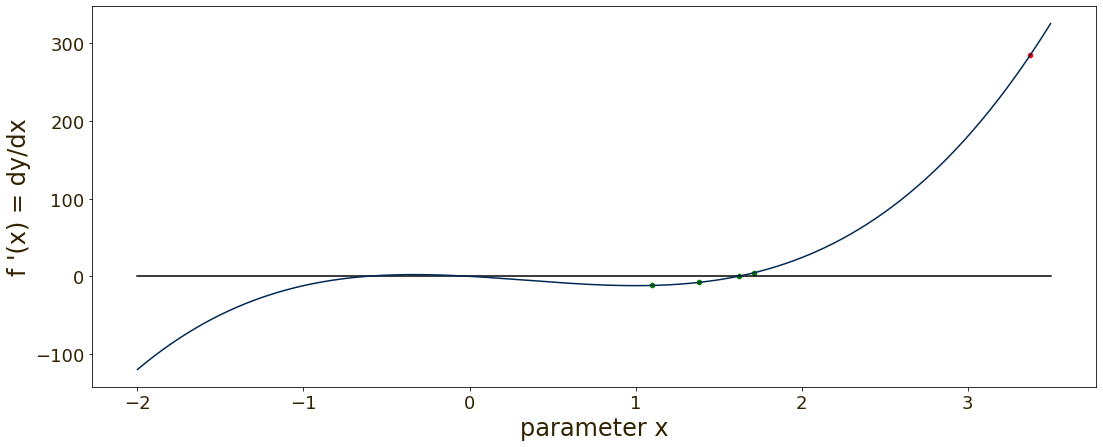

In [55]:
# Newton's method, where in each step we aim to reach the point where f'(x) = 0,
# or in other words, we aim at a change in f'(x) by the amount -f'(x)
#
# whenever this fails, we reduce a scaling factor delta
# (initially 1) by the factor alpha and try again;
# upon success, delta is set back to 1
#
# this stops when f'(x) has become very small (controlled by choice of epsilon)

x = 1.1
alpha = 0.125

yprime = fprime(x)

print(0, x, yprime, "initial", sep="\t")

x_accepted = [x]
yprime_accepted = [yprime]
x_rejected = []
yprime_rejected = []

i, delta = 0, 1
for i in range(1, 5):
    ysecond = fsecond(x)
    if ysecond == 0:
        print("plateau reached; terminating\n")
        break
    xshift = -delta*yprime/ysecond
    xtest = x + xshift
    yprimetest = fprime(xtest)
    print(i, round(xtest, 6), round(yprimetest, 6), sep="\t", end="\t")
    if abs(yprimetest) < abs(yprime):
        x, yprime = xtest, yprimetest
        delta = 1
        print("accepted")
        x_accepted.append(xtest)
        yprime_accepted.append(yprimetest)
    else:
        delta *= alpha
        print("rejected")
        x_rejected.append(xtest)
        yprime_rejected.append(yprimetest)

print("\nFinal outcome: x =", round(x, 6), ", y =", round(f(x), 6), end="\n\n")

# redraw the line plot for f'(x)
#
frame, axes = plt.subplots()
frame.set_size_inches(18, 7)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
axes.set_xlabel("parameter x", fontsize=24, color="#322300")
axes.set_ylabel("f '(x) = dy/dx", fontsize=24, color="#322300")
sbn.lineplot(x=[init, end], y=[0, 0], color="black", ax=axes)
sbn.lineplot(x=absc_prime, y=ordn_prime, color="#002855", ax=axes)

# add accepted and rejected points to the diagram
#
sbn.scatterplot(x=x_accepted, y=yprime_accepted, color="g", ax=axes)
sbn.scatterplot(x=x_rejected, y=yprime_rejected, color="r", ax=axes)

# print deviation from the actual minimum
#
print("deviation in x:", round(x - minimum_x, 6))
print("deviation in y:", round(f(x) - minimum_y, 6))